# Logistc Regression

## 公式推导  
sigmoid function  
$h(z) = \frac{1} {1 + e^{-z}}$  

线性方程  
$ln{\frac{y} {1 - y}} = \omega^{T}x + b$  

$y$可以视为$p(y = 1 | x)$, $1-y$则可以视为$p(y = 0 | x)$，所以：  
$p(y = 1 | x) = \frac{e^{\omega^{T}x + b}} {1 + e^{\omega^{T}x + b}}$  
$p(y = 0 | x) = \frac{1} {1 + e^{\omega^{T}x + b}}$

梯度下降法参数更新方程：  
$\omega_{j}' := \omega_{j}' - \alpha \sum_\limits{i=1}^{m}[(h(x^{(i)}) - y^{(i)})x_{j}^{(i)}]$  
矩阵写法：  
$\omega' := \omega' - \alpha \cdot X^T \cdot(h(X \cdot {\omega^T}) - y)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def design_matrix(X):
    """
    np.array X
    add 1.0 in each line

    return matrix of shape(n * (1+p))
    """
    n, p = X.shape
    mat = np.ones((n, 1))
    return np.c_[mat, X]


def sigmoid(x):
    """
    np.array x
    """
    return 1 / (1 + np.exp(-x))


def gradient_ascent(design_mat, y):
    labels = y[:, np.newaxis]
    
    alpha = 0.001
    max_iter = 500
    n, p = design_mat.shape
    weights = np.ones((p, 1))
    # vectorization
    for i in range(max_iter):
        # w_j := w_j - alpha * sigma((sigmoid(w.T*x_i) - y) * x_j)
        # descent: w := w - alpha * X.T * (sigmoid(X*w) - y)
        # ascent:  w := w + alpha * X.T * (y - sigmoid(X*w)) 
        h = sigmoid(design_mat.dot(weights))
        error = labels - h
        weights = weights + alpha * design_mat.T.dot(error)
    
    return weights


def learning_schedule(t):
    t0, t1 = 5, 50
    return t0 / (t + t1)


def stochastic_gradient_ascent(design_mat, y, max_iter = 500):
    n, p = design_mat.shape
    weights = np.ones((p))

    for i in range(max_iter):
        for j in range(n):
            alpha = learning_schedule(i * n + j)
            idx = np.random.randint(n)
            x = design_mat[idx] # design_mat[idx, :]
            label = y[idx]
            h = sigmoid(x[np.newaxis, :].dot(weights))
            weights = weights + alpha * x * (label - h)

    return weights

In [3]:
test_set = "F:/MLA/logistic_regression/test_set.txt"
df = pd.read_csv(test_set, sep="\t", header=-1)

X = df[df.columns[:2]]
y = df[df.columns[-1]]

design_mat = design_matrix(X)
omega = gradient_ascent(design_mat, y)

In [4]:
omega

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

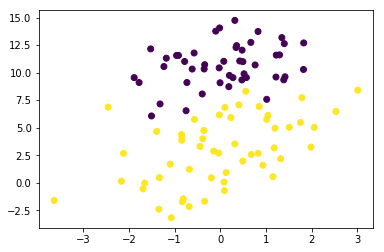

In [5]:
plt.scatter(df[0], df[1], c=df[2])
plt.show()